In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.shape

(3276, 10)

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# fill in missing values with the Mean of values above and below the cell

In [7]:
data = data.dropna()

In [8]:
for x in data:
  data[x] = data[x].fillna(data[x].mean())

<ipython-input-8-1c8bed2b6f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = data[x].fillna(data[x].mean())


In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [10]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
corr2 = data.corr()

In [12]:
sns.pairplot(data,markers="+",hue = 'Potability')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f91db1c92d0> (for post_execute):


KeyboardInterrupt: ignored

<Axes: >

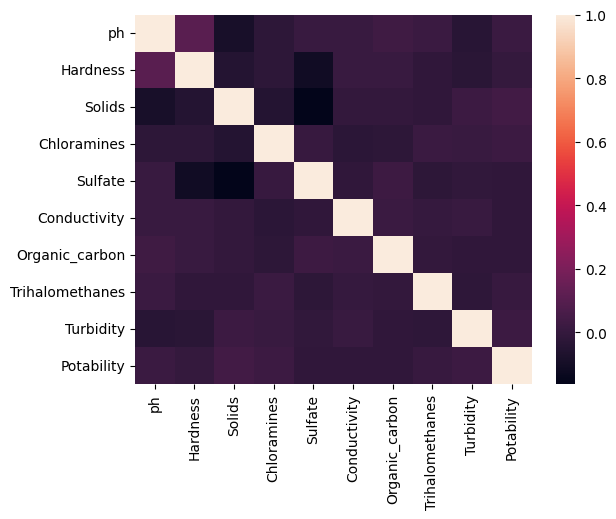

In [13]:
sns.heatmap(corr2)

In [15]:
X = data.drop('Potability',axis = 1)
Y = data.Potability

In [16]:
X.shape

(2011, 9)

In [17]:
Y.shape

(2011,)

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 89)

In [19]:
# Logistic Regression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
X_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction,Y_train)

In [23]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)

In [24]:
print('Train Accuracy : ', train_accuracy)
print('Test Accuracy : ', test_accuracy)

Train Accuracy :  0.593170007423905
Test Accuracy :  0.6039156626506024


In [25]:
#descision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [27]:
c_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 67,max_depth = 8 , min_samples_leaf = 20 )
c_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       random_state=67)

In [28]:
predict =c_entropy.predict(X_test)
DT_acc= accuracy_score(Y_test,predict)
print('Decision Tree Accuracy Score : ',DT_acc)

Decision Tree Accuracy Score :  0.641566265060241


In [29]:
import pickle
filename = 'Water_potablity_trained_model.sav'
pickle.dump(model,open(filename,'wb'))